## X-ray detection and imaging

We begin by loading the libraries you will require lateron for your calculations.

In [ ]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---

### Exercise 1

Select three of the requirements for X-ray scintillators and give detailed reasoning why these are important.

#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

X-ray scintillators are materials that convert X-ray radiation into visible light, enabling the detection and imaging of X-ray photons

- __high yield__  

- __good linearity__  

- __small time constant__  

- __transparent to scintillation light__  

- __temperature stability__  


---

### Exercise 2

The refractive index components for gold at different energies are given in the following table:

| Energy (keV) | Delta | Beta |
| --- | --- | --- |
| 10 | 2.99E-05 | 2.21E-06 |
| 15 | 1.35E-05 | 2.02E-06 |
| 20 | 7.95E-06 | 7.26E-07 |
| 25 | 5.13E-06 | 3.23E-07 |
| 30 | 3.56E-06 | 1.65E-07 |

Please calculate the linear attenuation coefficient of gold at the given X-ray energies in $keV$, indicating all assumption you are making and stating all used parameter values. Based on the attenuation coefficient, calculate the maximum thickness of a gold wire to be imaged using X-ray computed tomography, such that a transmission $I/I_0$ of $10\,\%$ is ensured at all times. Note that the speed of light $c=2.998\cdot10^8\,\frac{m}{s}$ and _Planck's_ constant $h=4.136\cdot10^{-15}\,eV\cdot s$. Please explain any non-linear behaviour that you may notice in the assessment of the energies.

#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

The refractive index component $\beta$ relates to the linear attenuation $\mu$ via $$\mu=\frac{4\pi}{\lambda}\beta$$ where $\lambda$ is the wavelength of the X-ray beam. The wavelength $\lambda$ of the X-ray beam relates to its energy $E$ via $$\lambda=\frac{hc}{E}$$ where $h$ is _Planck's_ constant and $c$ the speed of light. Given the linear attenuation coefficient, the transmission $T$ of a sample of thickness $l$ can be computed as $$T=exp^{-\mu l}$$ We require that $T\geq 0.1$, thus $$0.1\leq exp^{-\mu l}$$ and therefore $$l\leq -ln(0.1)/\mu$$ Entering the given values in the respective equations we obtain the following:

In [ ]:
# set parameters as given in the exercise sheet
h=4.136*10**(-15) #eV*s
c=2.998*10**(8) #m/s
E=np.array() #keV
beta=np.array()

# calculate lambda, mu and l_max
lbda= # m
mu= # m^(-1)
l_max= # mm

# display results and input data in pandas dataframe format
pd.DataFrame(np.transpose([E,lbda,beta,mu,l_max]),columns=['Energy / keV','\u03BB / m',' \u03B2','\u03BC / m^(-1)','l_max / mm'])

To assess the maximum wire thickness more easily, let's plot it.

In [ ]:
# import required libraries
import matplotlib.pyplot as plt

# set plot parameters (dpi and plot size)
my_dpi=150
plt.figure(figsize=(600/my_dpi,400/my_dpi), dpi=my_dpi)

# plot maximum wire thickness against X-ray photon energy
plt.plot()
plt.ylabel('Maximum wire thickness / mm')
plt.xlabel('X-ray energy / keV')
plt.ylim([0,0.05])
plt.xlim([8,32])
plt.tight_layout
plt.show()

We observe that the maximum diameter (or transmission length) of the gold wire at $15\,keV$ must be smaller than that at $10\,keV$ ($0.007\,mm$ vs. $0.01\,mm$). This is due to the fact that the L-edges of gold are located between $10\,keV$ and $15\,keV$, leading to a strong increase in the photoelectric absorption cross-section and hence attenuation coefficient.

---

### Exercise 3

It was very inconvenient to have to manually type the values of the exercise above into arrays. Go to https://henke.lbl.gov/optical_constants/getdb2.html and extract a text file for the refractive index components of magnesium, gadolinium and gold.  Use the pandas instead to read in the text files and plot the both refractive index components for the three materials against each other. What do you observe?

#### Solution
_- solve the exercise beneath using markdown and/or code blocks -_

If you follow the link you get to an interface that looks as follows:  

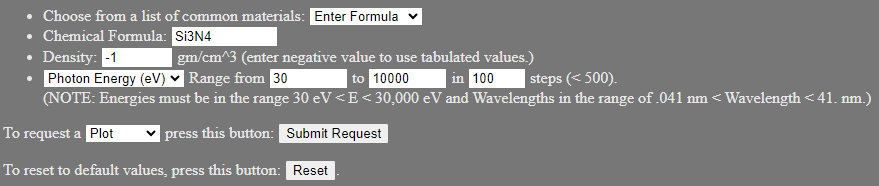  

You should enter the element or composition of your material, as well as it's density (not necessary for elements) and the X-ray energies at which you want to assess the refractive index components. For this exercise, I selected $5-30\,keV$, which is a reasonable range we might work at at the synchrotron and step size of $250\,eV$. Select the request for text file and click submit. A new tab will open with the file, which you can copy and save in any text editor.

In the next step, we make use of the working with jupyter introduction and use pandas to load the datasets.

In [ ]:
# load text files as dataframes
data_Mg=pd.read_csv('', sep=, header=, usecols=[], names=['Energy / eV', 'delta','beta'])
data_Au=pd.read_csv('', sep=, header=, usecols=[], names=['Energy / eV', 'delta','beta'])
data_Gd=pd.read_csv('', sep=, header=, usecols=[], names=['Energy / eV', 'delta','beta'])

# plot the delta and beta values of the three elements in one graph
plt.plot(data_Mg[''], data_Mg[''],color='black',label='Mg delta')
plt.plot(data_Au[''], data_Au[''],color='black',linestyle='dashed',label='Au delta')
plt.plot(data_Gd[''], data_Gd[''],color='black',linestyle='dotted',label='Gd delta')
plt.plot(data_Mg[''], data_Mg[''],color='red',label='Mg beta')
plt.plot(data_Au[''], data_Au[''],color='red',linestyle='dashed',label='Au beta')
plt.plot(data_Gd[''], data_Gd[''],color='red',linestyle='dotted',label='Gd beta')
plt.xlabel('Energy / eV')
plt.ylabel('Refractive index components')
plt.legend()
plt.yscale('log')

We can see that for all elements, the delta component is larger than the beta component of the refractive index. This indicates, that the induced phase shift will be larger than the attenuation of the X-rays. If we want to assess this difference in detail, we can plot it. We can also see that the both delta and beta decrease with increasing energy. However, this decrease is larger for the attenuation than for the phase shift.

---